In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read in data

In [214]:
folder = '../data/'

Seeds_24 = pd.read_csv(folder + '2024_tourney_seeds.csv') # not needed
Teams = pd.read_csv(folder + 'MTeams.csv') # not needed


# important

Seeds = pd.read_csv(folder + 'MNCAATourneySeeds.csv')
Conferences = pd.read_csv(folder + 'MTeamConferences.csv')
RegularSeason = pd.read_csv(folder + 'MRegularSeasonDetailedResults.csv')
TourneyCompact = pd.read_csv(folder + 'MNCAATourneyCompactResults.csv')
ConferenceTourney = pd.read_csv(folder + 'MConferenceTourneyGames.csv')
Kenpom = pd.read_csv(folder + 'MKenpomData.csv')

display(Kenpom.set_index(['Season', 'Team']))

Rk  Conf   W-L  AdjEM   AdjO  AdjORk   AdjD  AdjDRk  \
Season Team                                                                 
2003   Kentucky        1   SEC  32-4  29.18  116.5       5   87.4       4   
       Kansas          2   B12  30-8  28.62  115.0      12   86.4       3   
       Pittsburgh      3    BE  28-5  28.61  114.8      14   86.2       2   
       Arizona         4   P10  28-4  26.80  115.6      10   88.8       8   
       Illinois        5   B10  25-7  24.47  113.2      22   88.7       7   
...                  ...   ...   ...    ...    ...     ...    ...     ...   
2024   Stonehill     358   NEC  4-27 -22.90   91.8     354  114.7     344   
       Pacific       359   WCC  6-26 -22.92   95.2     340  118.2     359   
       IUPUI         360  Horz  6-26 -25.65   92.1     353  117.8     358   
       Coppin St     361  MEAC  2-27 -25.83   85.7     361  111.5     290   
       MS Valley St  362  SWAC  1-30 -31.29   85.3     362  116.6     353   

                     AdjT  AdjTRk   Luck  LuckRk  AdjSOS  AdjSOSRk   OppO  \
Season Team                                                                 
2003   Kentucky      67.7     132  0.051      53   11.20         4  108.6   
       Kansas        72.2      14 -0.017     208   11.84         2  108.6   
       Pittsburgh    64.7     266 -0.023     224    7.08        56  105.5   
       Arizona       72.7      11 -0.007     181    8.69        31  107.2   
       Illinois      67.8     127 -0.029     242    7.29        52  105.8   
...                   ...     ...    ...     ...     ...       ...    ...   
2024   Stonehill     67.6     164 -0.078     335   -5.07       304  102.2   
       Pacific       68.3     127 -0.014     222   -0.20       164  106.2   
       IUPUI         67.4     182 -0.019     237   -3.12       253  106.1   
       Coppin St     66.0     266 -0.057     309   -5.25       308  102.7   
       MS Valley St  64.6     325 -0.060     317   -2.51       232  104.1   

                     OppORk   OppD  OppDRk  NCSOS  NCSOSRk  
Season Team                                                 
2003   Kentucky           3   97.4      16   6.77       33  
       Kansas             2   96.8       9   6.07       35  
       Pittsburgh        66   98.4      48  -8.24      310  
       Arizona           14   98.5      52   8.19       26  
       Illinois          60   98.5      53  -4.18      257  
...                     ...    ...     ...    ...      ...  
2024   Stonehill        318  107.3     225   4.15       82  
       Pacific          173  106.4     178  -5.05      314  
       IUPUI            176  109.3     342  -4.32      304  
       Coppin St        310  108.0     274   0.57      172  
       MS Valley St     273  106.6     189  15.19        2  

[7257 rows x 20 columns]

# Example of how to see a team's results

In [132]:
# Filter for the 2024 season
games_2024 = RegularSeason[RegularSeason['Season'] == 2024]

# Merge to get the winning team names
games_with_win_names = pd.merge(games_2024, Teams[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID', how='left')
games_with_win_names.rename(columns={'TeamName': 'WTeamName'}, inplace=True)

# Merge to get the losing team names
games_with_both_names = pd.merge(games_with_win_names, Teams[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID', how='left', suffixes=('', '_L'))
games_with_both_names.rename(columns={'TeamName': 'LTeamName'}, inplace=True)

# Filter for games involving Texas
texas_games = games_with_both_names[(games_with_both_names['WTeamName'] == 'Texas') | (games_with_both_names['LTeamName'] == 'Texas')]

# Select columns to display, including opponent name
# Assuming you want to see the season, winning and losing team names, and scores for context
texas_games = texas_games[['Season', 'WTeamName', 'LTeamName', 'WScore', 'LScore']]

# Show the games
display(texas_games)

,Season,WTeamName,LTeamName,WScore,LScore
89,2024,Texas,Incarnate Word,88,56
230,2024,Texas,Delaware St,86,59
428,2024,Texas,Rice,80,64
636,2024,Texas,Louisville,81,80
659,2024,Connecticut,Texas,81,71
994,2024,Texas,Wyoming,86,63
1138,2024,Texas,Texas St,77,58
1369,2024,Marquette,Texas,86,65
1503,2024,Texas,Houston Chr,77,50
1687,2024,Texas,LSU,96,85


# Generate team database

In [220]:
WinTeams = pd.DataFrame()
LossTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
       'Loc', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

# set up wins dataframe
WinTeams[columns] = RegularSeason[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins'] = 1
WinTeams['Losses'] = 0

# set up losses dataframe
LossTeams[columns] = RegularSeason[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

LossTeams['Loc'] = LossTeams['Loc'].apply(lambda loc: 'A' if loc == 'H' else ('H' if loc == 'A' else 'N'))



LossTeams['Wins'] = 0
LossTeams['Losses'] = 1

# set up full df

AggTeams = pd.concat([WinTeams, LossTeams]).groupby(['Season', 'TeamID']).sum()

AggTeams['NumGames'] = AggTeams['Wins'] + AggTeams['Losses']

AggTeams.reset_index(inplace=True)

# Combine all games, tagging each team with its opponents
matches = pd.concat([
    RegularSeason[['Season', 'WTeamID', 'LTeamID']].rename(columns={'WTeamID': 'TeamID', 'LTeamID': 'OpponentID'}),
    RegularSeason[['Season', 'LTeamID', 'WTeamID']].rename(columns={'LTeamID': 'TeamID', 'WTeamID': 'OpponentID'})
])

# Merge matches with AggTeams to include opponent wins and total games
matches_with_stats = matches.merge(
    AggTeams, how='left', left_on=['Season', 'OpponentID'], right_on=['Season', 'TeamID']
).rename(columns={'Wins': 'OppWins', 'NumGames': 'OppNumGames'})

# Calculate total opponent wins and games for strength of schedule
opp_stats = matches_with_stats.groupby(['Season', 'TeamID_x']).agg(
    OppWins=pd.NamedAgg(column='OppWins', aggfunc='sum'),
    OppGames=pd.NamedAgg(column='OppNumGames', aggfunc='sum')
).reset_index()

# Merge these stats back into AggTeams for the strength of schedule
AggTeams = pd.merge(
    AggTeams, opp_stats, how='left', left_on=['Season', 'TeamID'], right_on=['Season', 'TeamID_x']
).drop(columns=['TeamID_x'])

# Calculate strength of victory metrics
# Only considering wins
victory_matches = RegularSeason[['Season', 'WTeamID', 'LTeamID']].rename(columns={'WTeamID': 'TeamID', 'LTeamID': 'OpponentID'})

# Merge with AggTeams to get opponent stats for victories only
victory_matches_with_stats = victory_matches.merge(
    AggTeams[['Season', 'TeamID', 'Wins', 'NumGames']], how='left', left_on=['Season', 'OpponentID'], right_on=['Season', 'TeamID']
).rename(columns={'Wins': 'OppVictoryWins', 'NumGames': 'OppVictoryNumGames'})

# Aggregate total wins and games of defeated opponents for strength of victory
victory_stats = victory_matches_with_stats.groupby(['Season', 'TeamID_x']).agg(
    OppVictoryWins=pd.NamedAgg(column='OppVictoryWins', aggfunc='sum'),
    OppVictoryGames=pd.NamedAgg(column='OppVictoryNumGames', aggfunc='sum')
).reset_index()

# Merge these stats back into AggTeams for the strength of victory
AggTeams = pd.merge(
    AggTeams, victory_stats, how='left', left_on=['Season', 'TeamID'], right_on=['Season', 'TeamID_x']
).drop(columns=['TeamID_x'])

AggTeams = pd.merge(AggTeams, Teams[['TeamID', 'TeamName']], on='TeamID', how='left')

AggTeams = pd.merge(AggTeams, Kenpom[['Season', 'Team', 'Rk']], left_on=['Season', 'TeamName'], right_on=['Season', 'Team'], how='left')

AggTeams.drop(columns=['Team'], inplace=True)



# Optionally, reset ['Season', 'TeamID'] as index if that was the original structure
AggTeams.set_index(['Season', 'TeamID'], inplace=True)

# Display the updated AggTeams DataFrame with the new metrics
display(AggTeams.drop(columns=['Loc']))




Points  OppPoints  NumOT  FGM   FGA  FGM3  FGA3  FTM  FTA   OR  \
Season TeamID                                                                   
2003   1102      1603       1596      0  536  1114   219   583  312  479  117   
       1103      2127       2110      8  733  1508   147   434  514  698  264   
       1104      1940       1820      1  673  1601   178   556  416  586  380   
       1105      1866       1993      4  634  1602   197   540  401  568  351   
       1106      1781       1785      1  656  1548   171   494  298  461  344   
...               ...        ...    ...  ...   ...   ...   ...  ...  ...  ...   
2024   1474      2166       2332      0  757  1737   232   707  420  595  236   
       1475      1748       1959      1  587  1471   168   523  406  546  222   
       1476      1778       2158      1  643  1617   232   761  260  373  188   
       1477      1664       1927      6  580  1478   212   700  292  420  178   
       1478      1752       1837      1  619  1483   235   700  279  370  184   

               ...  OppPF  Wins  Losses  NumGames  OppWins  OppGames  \
Season TeamID  ...                                                     
2003   1102    ...    514    12      16        28      429       795   
       1103    ...    606    13      14        27      380       774   
       1104    ...    539    17      11        28      470       814   
       1105    ...    496     7      19        26      312       739   
       1106    ...    452    13      15        28      369       800   
...            ...    ...   ...     ...       ...      ...       ...   
2024   1474    ...    508    10      18        28      398       765   
       1475    ...    482     5      21        26      354       696   
       1476    ...    401     3      25        28      352       735   
       1477    ...    367     7      18        25      316       646   
       1478    ...    349     9      16        25      271       663   

               OppVictoryWins  OppVictoryGames          TeamName     Rk  
Season TeamID                                                            
2003   1102             127.0            328.0         Air Force  152.0  
       1103             191.0            375.0             Akron  178.0  
       1104             269.0            488.0           Alabama   38.0  
       1105              47.0            189.0       Alabama A&M  309.0  
       1106             135.0            363.0        Alabama St  257.0  
...                       ...              ...               ...    ...  
2024   1474             126.0            271.0         Queens NC  267.0  
       1475              55.0            129.0  Southern Indiana  328.0  
       1476              25.0             78.0         Stonehill  358.0  
       1477              62.0            183.0   TX A&M Commerce  329.0  
       1478              80.0            235.0          Le Moyne  300.0  

[7617 rows x 38 columns]

# Calculate regular season stats

In [216]:
# Initialize RegSeasonStats DataFrame
RegSeasonStats = pd.DataFrame(index=AggTeams.index)

# Basic stats that depend on the total number of games
total_stats = {
    'WinPct': ('Wins', 'NumGames'),
    'PointsPerGame': ('Points', 'NumGames'),
    'OppPointsPerGame': ('OppPoints', 'NumGames'),
    'PointsRatio': ('Points', 'OppPoints'),
    'OTPerGame': ('NumOT', 'NumGames'),
    'StrengthOfSchedule': ('OppWins', 'OppGames'),
    'StrengthOfVictory': ('OppVictoryWins', 'OppVictoryGames')
}

# Per game stats and percentages
in_game = {
    'FG': ('FGM', 'FGA'),
    'OppFG': ('OppFGM', 'OppFGA'),
    '3Pt': ('FGM3', 'FGA3'),
    'Opp3Pt': ('OppFGM3', 'OppFGA3'),
    'FT': ('FTM', 'FTA'),
    'OR': ('OR', 'NumGames'),
    'DR': ('DR', 'NumGames'),
    'Ast': ('Ast', 'NumGames'),
    'TO': ('TO', 'NumGames'),
    'Stl': ('Stl', 'NumGames'),
    'Blk': ('Blk', 'NumGames'),
    'PF': ('PF', 'NumGames'),
}

# Calculate basic stats
for stat, (numerator, denominator) in total_stats.items():
    RegSeasonStats[stat] = AggTeams[numerator] / AggTeams[denominator]

# Calculate per game stats and percentages
for stat_prefix, (made, attempted) in in_game.items():
    if 'NumGames' in attempted:  # For per game calculations
        RegSeasonStats[f'{stat_prefix}PerGame'] = AggTeams[made] / AggTeams[attempted]
    else:  # For percentage calculations
        RegSeasonStats[f'{stat_prefix}PerGame'] = AggTeams[made] / AggTeams['NumGames']
        RegSeasonStats[f'{stat_prefix}Pct'] = AggTeams[made] / AggTeams[attempted]

# Assuming OppFTPerGame is desired as well
RegSeasonStats['OppFTPerGame'] = AggTeams['OppFTM'] / AggTeams['NumGames']


# Display the DataFrame
display(RegSeasonStats)

WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  \
Season TeamID                                                           
2003   1102    0.428571      57.250000         57.000000     1.004386   
       1103    0.481481      78.777778         78.148148     1.008057   
       1104    0.607143      69.285714         65.000000     1.065934   
       1105    0.269231      71.769231         76.653846     0.936277   
       1106    0.464286      63.607143         63.750000     0.997759   
...                 ...            ...               ...          ...   
2024   1474    0.357143      77.357143         83.285714     0.928816   
       1475    0.192308      67.230769         75.346154     0.892292   
       1476    0.107143      63.500000         77.071429     0.823911   
       1477    0.280000      66.560000         77.080000     0.863518   
       1478    0.360000      70.080000         73.480000     0.953729   

               OTPerGame  StrengthOfSchedule  StrengthOfVictory  FGPerGame  \
Season TeamID                                                                
2003   1102     0.000000            0.539623           0.387195  19.142857   
       1103     0.296296            0.490956           0.509333  27.148148   
       1104     0.035714            0.577396           0.551230  24.035714   
       1105     0.153846            0.422192           0.248677  24.384615   
       1106     0.035714            0.461250           0.371901  23.428571   
...                  ...                 ...                ...        ...   
2024   1474     0.000000            0.520261           0.464945  27.035714   
       1475     0.038462            0.508621           0.426357  22.576923   
       1476     0.035714            0.478912           0.320513  22.964286   
       1477     0.240000            0.489164           0.338798  23.200000   
       1478     0.040000            0.408748           0.340426  24.760000   

                  FGPct  OppFGPerGame  ...  FTPerGame     FTPct  ORPerGame  \
Season TeamID                          ...                                   
2003   1102    0.481149     19.285714  ...  11.142857  0.651357   4.178571   
       1103    0.486074     27.777778  ...  19.037037  0.736390   9.777778   
       1104    0.420362     23.250000  ...  14.857143  0.709898  13.571429   
       1105    0.395755     27.000000  ...  15.423077  0.705986  13.500000   
       1106    0.423773     21.714286  ...  10.642857  0.646421  12.285714   
...                 ...           ...  ...        ...       ...        ...   
2024   1474    0.435809     30.821429  ...  15.000000  0.705882   8.428571   
       1475    0.399048     24.346154  ...  15.615385  0.743590   8.538462   
       1476    0.397650     26.714286  ...   9.285714  0.697051   6.714286   
       1477    0.392422     27.000000  ...  11.680000  0.695238   7.120000   
       1478    0.417397     26.560000  ...  11.160000  0.754054   7.360000   

               DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
Season TeamID                                                             
2003   1102    16.821429   13.000000  11.428571    5.964286    1.785714   
       1103    19.925926   15.222222  12.629630    7.259259    2.333333   
       1104    23.928571   12.107143  13.285714    6.607143    3.785714   
       1105    23.115385   14.538462  18.653846    9.307692    2.076923   
       1106    23.857143   11.678571  17.035714    8.357143    3.142857   
...                  ...         ...        ...         ...         ...   
2024   1474    23.392857   12.285714  11.428571    6.750000    2.785714   
       1475    24.615385   10.961538  12.884615    5.923077    2.576923   
       1476    23.142857   11.785714  13.250000    6.464286    2.285714   
       1477    19.920000   12.760000  11.200000    7.360000    4.720000   
       1478    22.880000   14.760000  10.640000    7.240000    2.880000   

               PFPerGame  OppFTPerGame  
Season TeamID       

# Refactor Seeds and Tournament Results

In [7]:
SeasonSeeds = Seeds.set_index(['Season', 'TeamID'])

winID = TourneyCompact['WTeamID']
lossID = TourneyCompact['LTeamID']
season = TourneyCompact['Season']

# set winners
winners =  pd.DataFrame()
winners[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'WTeamID', 'LTeamID']]
winners['Result'] = 1

# set losers
losers =  pd.DataFrame()
losers[['Season', 'Team1', 'Team2']] = TourneyCompact[['Season', 'LTeamID', 'WTeamID']]
losers['Result'] = 0

TourneyGames = pd.concat([winners, losers])
# Filter TourneyGames for seasons between 2003 and 2022, inclusive
TourneyGames = TourneyGames[TourneyGames['Season'] >= 2003].reset_index(drop=True)

display(TourneyGames)

,Season,Team1,Team2,Result
0,2003,1421,1411,1
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1
...,...,...,...,...
2625,2023,1400,1274,0
2626,2023,1166,1361,0
2627,2023,1274,1163,0
2628,2023,1194,1361,0


# Set seeds

In [8]:
seeds_1, seeds_2 = [], []

def fill_seeds(s, l):
    for x in range(len(TourneyGames)):
        t = (TourneyGames['Season'][x], TourneyGames[s][x])
        seed = int(SeasonSeeds.loc[t].values[0][1:3])
        l.append(seed)

fill_seeds('Team1', seeds_1)
fill_seeds('Team2', seeds_2)

TourneyGames['Seed1'] = seeds_1
TourneyGames['Seed2'] = seeds_2

display(TourneyGames)

,Season,Team1,Team2,Result,Seed1,Seed2
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2625,2023,1400,1274,0,2,5
2626,2023,1166,1361,0,6,5
2627,2023,1274,1163,0,5,4
2628,2023,1194,1361,0,9,5


# Generate model

In [16]:
total_stats = []



for x in range(len(TourneyGames)):
    t = (TourneyGames['Season'][x], TourneyGames['Team1'][x])
    stats1 = RegSeasonStats.loc[t].copy()
    stats1['Seed'] = TourneyGames.loc[x, 'Seed1']
    
    t = (TourneyGames['Season'][x], TourneyGames['Team2'][x])
    stats2 = RegSeasonStats.loc[t].copy()
    stats2['Seed'] = TourneyGames.loc[x, 'Seed2']
    
    stats = stats1 - stats2
    stats['Result'] = TourneyGames['Result'][x]
    total_stats.append(stats)
    
TourneyStats = pd.DataFrame(total_stats)

display(TourneyStats)  

,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,StrengthOfSchedule,StrengthOfVictory,FGPerGame,FGPct,OppFGPerGame,...,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,Seed,Result
0,-0.151724,-1.593103,7.614943,-0.120072,0.139080,0.109852,-0.000511,-0.354023,-0.018262,2.126437,...,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448,3.274713,0.0,1.0
1,0.237685,17.421182,7.112069,0.139285,0.002463,0.116589,0.160283,5.493842,0.016969,3.598522,...,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448,0.662562,-15.0,1.0
2,-0.172414,1.448276,3.344828,-0.033801,0.034483,0.068519,-0.011815,0.931034,0.040251,1.517241,...,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172,0.758621,3.0,1.0
3,-0.085684,0.102403,8.908046,-0.148414,-0.030303,-0.006213,0.001707,-2.076280,0.005763,2.466040,...,-0.292581,0.094044,-1.197492,4.877743,-1.290491,-0.454545,3.692790,3.889237,5.0,1.0
4,0.124138,2.082759,1.758621,0.003015,0.070115,-0.032201,-0.023965,3.011494,0.009399,1.945977,...,1.508046,2.345977,1.333333,-0.027586,-1.214943,-0.273563,-1.563218,-3.503448,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,-0.016544,-1.553309,-4.713235,0.053933,0.056985,0.043084,0.039390,-0.762868,-0.017130,-3.406250,...,-0.380515,0.240809,0.974265,0.091912,0.715074,0.365809,3.211397,3.191176,-3.0,0.0
2626,-0.176136,5.292614,4.672348,0.001005,-0.001894,-0.010161,-0.055656,2.421402,0.025867,3.733902,...,-1.703598,3.804924,2.877841,0.063447,-1.882576,0.463068,-3.348485,-2.783144,1.0,0.0
2627,0.023674,0.951705,7.094697,-0.105477,0.031250,-0.005403,0.022000,1.362689,0.025980,4.603220,...,-2.819129,-1.245265,-2.335227,-1.395833,0.798295,-1.597538,-3.714962,-4.734848,1.0,0.0
2628,0.093750,6.812500,1.468750,0.079202,0.000000,-0.076366,-0.049095,2.812500,0.026823,0.812500,...,-0.093750,2.625000,1.187500,0.187500,-0.625000,-1.187500,-0.656250,-0.156250,4.0,0.0


Result                1.00
Seed                  0.48
PointsRatio           0.40
StrengthOfVictory     0.39
StrengthOfSchedule    0.36
WinPct                0.33
FGPerGame             0.26
PointsPerGame         0.23
BlkPerGame            0.20
FGPct                 0.20
OppFGPct              0.20
AstPerGame            0.20
OppPointsPerGame      0.16
PFPerGame             0.16
TOPerGame             0.15
OppFTPerGame          0.15
ORPerGame             0.15
DRPerGame             0.12
OTPerGame             0.12
Opp3PtPct             0.12
3PtPct                0.10
StlPerGame            0.10
OppFGPerGame          0.09
Opp3PtPerGame         0.07
3PtPerGame            0.06
FTPct                 0.05
FTPerGame             0.02
Name: Result, dtype: float64

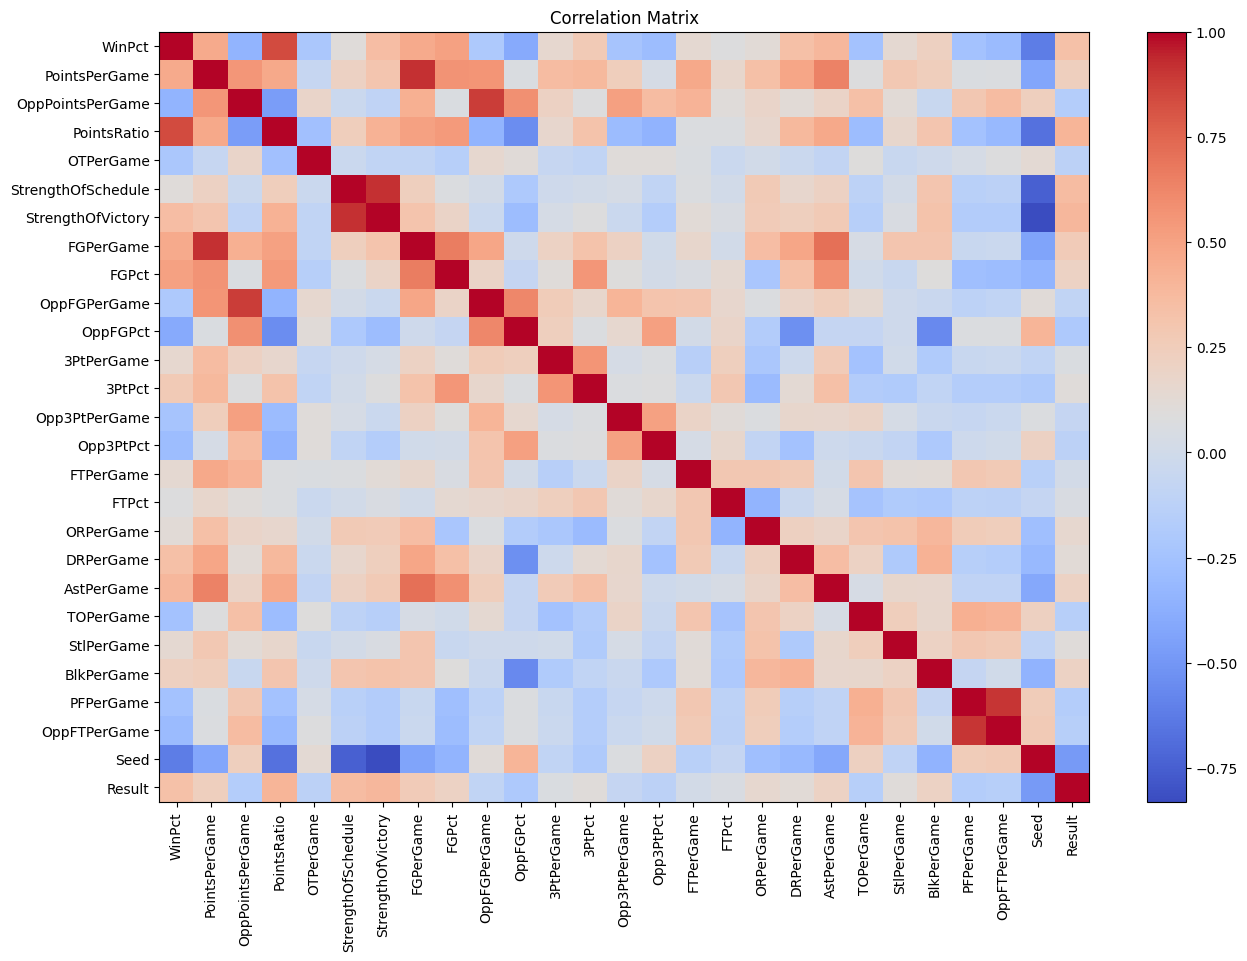

In [41]:
# Find correlations
corrs = round(TourneyStats.corr(), 2)
display(np.abs(corrs['Result']).sort_values(ascending=False))

# Display the correlation matrix
plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix')
plt.imshow(corrs, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns, rotation='vertical')
plt.yticks(range(len(corrs)), corrs.columns)
plt.show()

# Train model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [44]:
# Prepare your data
X = TourneyStats.drop('Result', axis=1)
y = TourneyStats['Result']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

display(X_train)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,StrengthOfSchedule,StrengthOfVictory,FGPerGame,FGPct,OppFGPerGame,...,FTPct,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,Seed
535,0.156250,0.625000,-4.031250,0.082824,0.062500,-0.042628,-0.028623,1.625000,0.034257,-0.375000,...,-0.068022,-1.656250,-0.375000,0.562500,-1.031250,0.406250,-0.437500,-0.312500,-2.406250,-1.0
674,-0.087879,3.766667,4.572727,-0.020431,0.066667,-0.007731,-0.000358,1.066667,0.016256,3.581818,...,0.049007,-3.293939,0.327273,-1.633333,0.093939,1.036364,-0.069697,-2.972727,-1.778788,9.0
1727,-0.100379,-10.979167,-8.405303,-0.026894,0.000947,0.039589,0.019020,-5.346591,0.010740,-4.292614,...,0.037558,-4.150568,-1.005682,-1.991477,0.033144,-2.942235,0.553030,0.211174,-0.997159,-1.0
1378,-0.060920,1.229885,-3.529885,0.079486,-0.034483,0.031358,0.020979,0.991954,0.015220,-0.606897,...,-0.027685,-0.010345,0.003448,1.767816,1.279310,1.822989,-2.375862,0.113793,-2.018391,-1.0
959,0.299242,10.991477,4.011364,0.093717,0.063447,-0.037540,0.013312,3.804924,0.019072,2.235795,...,0.001239,2.546402,-0.399621,-0.688447,-1.088068,2.482955,-0.100379,-2.178030,-1.228220,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.025847,4.032086,8.982175,-0.107832,0.029412,0.100258,0.100460,2.388592,0.005301,4.555258,...,-0.032807,0.679144,-1.260250,-0.894831,0.908200,-0.698752,1.506239,0.445633,0.480392,-8.0
905,-0.187500,-9.281250,-1.031250,-0.122538,0.062500,0.053527,0.067394,-4.062500,-0.058870,-0.562500,...,-0.076930,1.343750,-5.187500,0.187500,0.781250,3.093750,1.062500,-1.031250,-0.875000,-1.0
1096,0.181818,3.363636,-4.151515,0.111942,0.000000,0.022781,0.056916,3.575758,0.040078,-2.878788,...,0.026695,-0.060606,1.515152,2.363636,-0.969697,-0.303030,2.000000,1.484848,1.606061,-8.0
235,0.008046,-10.979310,-10.063218,0.012937,0.066667,-0.066812,-0.079777,-2.473563,0.001682,-3.973563,...,-0.035221,-3.934483,-1.165517,-2.798851,-3.420690,-0.596552,-0.397701,-1.979310,-1.532184,8.0


(2104, 26) (526, 26) (2104,) (526,)


In [45]:
# Random forest
rf = RandomForestClassifier(random_state=1)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)

# Logistic regression
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_scaled, y_train)
lr_score = lr.score(X_test_scaled, y_test)

# Naive bayes
nb = GaussianNB()
nb = nb.fit(X_train_scaled, y_train)
nb_score = nb.score(X_test_scaled, y_test)

print('Random forest score: {:.6f}'.format(rf_score))
print('Logistic regression score: {:.6f}'.format(lr_score))
print('Naive bayes score: {:.6f}'.format(nb_score))

print(classification_report(y_test, lr.predict(X_test_scaled)))

Random forest score: 0.707224
Logistic regression score: 0.711027
Naive bayes score: 0.697719
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       271
         1.0       0.71      0.68      0.70       255

    accuracy                           0.71       526
   macro avg       0.71      0.71      0.71       526
weighted avg       0.71      0.71      0.71       526



In [46]:
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=10)
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=10)
nb_cv_scores = cross_val_score(nb, X_train_scaled, y_train, cv=10)

print('Random forest cross validation: {:.6f}'.format(rf_cv_scores.mean()))
print('Logistic regression cross validation: {:.6f}'.format(lr_cv_scores.mean()))
print('Naive bayes cross validation: {:.6f}'.format(nb_cv_scores.mean()))

Random forest cross validation: 0.692020
Logistic regression cross validation: 0.708179
Naive bayes cross validation: 0.685827


# Predict some games

In [14]:
# get team names
raw_df = RegSeasonStats.reset_index()

# Merge to get the winning team names
def get_df(season):
    TeamDf = raw_df[raw_df['Season'] == season]
    TeamNameDf = pd.merge(TeamDf, Teams[['TeamID', 'TeamName']], on='TeamID', how='left')
    return TeamNameDf

TeamNameDf = get_df(2023)
SeedsDf = pd.merge(TeamNameDf, Seeds[(Seeds['Season'] == 2023)])

# drop one play in team, we will handle this later
mask = SeedsDf['Seed'].str.contains('b', case=False, na=False)
SeedsDf = SeedsDf[~mask]

SeedsDf['Seed'] = SeedsDf['Seed'].str[1:3].astype(int)
SeedsDf = SeedsDf.sort_values(by='Seed', ignore_index=True)

display(SeedsDf)



,Season,TeamID,WinPct,PointsPerGame,OppPointsPerGame,PointsRatio,OTPerGame,FGPerGame,FGPct,OppFGPerGame,...,ORPerGame,DRPerGame,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,OppFTPerGame,TeamName,Seed
0,2023,1104,0.852941,82.176471,68.500000,1.199657,0.176471,27.764706,0.446336,23.941176,...,11.264706,29.617647,15.205882,13.588235,6.058824,5.058824,18.617647,15.088235,Alabama,1
1,2023,1345,0.852941,73.088235,62.735294,1.165026,0.029412,25.441176,0.459373,24.058824,...,11.029412,25.205882,15.500000,10.411765,4.794118,3.617647,13.705882,8.205882,Purdue,1
2,2023,1242,0.794118,74.941176,67.941176,1.103030,0.058824,27.647059,0.465577,24.205882,...,8.470588,24.764706,16.441176,12.058824,8.794118,3.764706,16.558824,13.147059,Kansas,1
3,2023,1222,0.911765,75.029412,56.500000,1.327954,0.000000,27.529412,0.461766,18.764706,...,11.676471,24.411765,14.823529,9.441176,8.323529,4.764706,16.558824,12.705882,Houston,1
4,2023,1112,0.823529,82.676471,71.500000,1.156314,0.000000,29.382353,0.495782,25.852941,...,8.823529,27.294118,19.176471,13.117647,6.117647,3.205882,17.029412,11.764706,Arizona,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023,1436,0.687500,72.156250,66.718750,1.081499,0.093750,26.187500,0.471316,24.531250,...,5.281250,23.437500,13.656250,8.875000,5.593750,2.937500,14.937500,10.750000,Vermont,15
60,2023,1297,0.625000,67.187500,64.718750,1.038146,0.156250,24.093750,0.425967,23.000000,...,9.656250,20.093750,13.187500,10.531250,9.062500,2.593750,15.593750,11.281250,N Kentucky,16
61,2023,1369,0.515152,77.212121,77.696970,0.993760,0.151515,26.272727,0.433717,26.424242,...,7.636364,23.878788,13.424242,12.424242,6.666667,3.181818,21.484848,17.545455,SE Missouri St,16
62,2023,1192,0.531250,76.281250,75.968750,1.004114,0.093750,27.781250,0.451040,26.656250,...,9.875000,20.625000,14.312500,11.156250,7.437500,1.875000,19.125000,14.500000,F Dickinson,16


In [15]:
def predict_winner(team1, team2, season):
    # Get the stats of each team
    TeamDf = get_df(season)
    
    def get_seeds():
        season_df = SeasonSeeds.loc[season]
        # Get seed of team 1
        id1 = TeamNameDf.loc[TeamNameDf['TeamName'] == team1, 'TeamID'].values[0]
        seed1 = season_df.loc[id1]['Seed']
        # Get seed of team 2
        id2 = TeamNameDf.loc[TeamNameDf['TeamName'] == team2, 'TeamID'].values[0]
        seed2 = season_df.loc[id2]['Seed']
        return (int(seed1[1:3]), int(seed2[1:3]))
    
    team1_stats = TeamDf[TeamDf['TeamName'] == team1].drop(['Season', 'TeamID', 'TeamName'], axis=1)
    team2_stats = TeamDf[TeamDf['TeamName'] == team2].drop(['Season', 'TeamID', 'TeamName'], axis=1)
    
    # seed1, seed2 = get_seeds()
    team1_stats['Seed'] = SeedsDf[SeedsDf['TeamName'] == team1]['Seed']
    team2_stats['Seed'] = SeedsDf[SeedsDf['TeamName'] == team2]['Seed']
    
    print(team1_stats)
    print(team2_stats)
    diff = team1_stats.values - team2_stats.values
    
    # Scale the data
    diff_scaled = scaler.transform(diff)
    
    probs = lr.predict_proba(diff_scaled)
    
    # Assuming class 1 corresponds to team1 winning and class 0 to team2, adjust indices as needed
    team1_prob = probs[0][1]
    team2_prob = probs[0][0]
    
    
    
    winner = team1 if team1_prob > team2_prob else team2
    winning_prob = max(team1_prob, team2_prob)

    return winner, winning_prob


# Example usage (Make sure 'TeamNameDf', 'lr', and 'scaler' are correctly defined)
winner = predict_winner('Iona', 'Connecticut', 2023)
print("Predicted winner:", winner[0], '\nProbability:', f'{round(winner[1]*100, 2)}%')


       WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
125  0.794118      76.382353              65.0     1.175113   0.029412   

     FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
125  28.176471  0.460798     23.352941  0.408646    7.058824  ...  0.731343   

     ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
125  10.323529  23.117647   15.029412  10.294118    7.470588    5.558824   

     PFPerGame  OppFTPerGame  Seed  
125  16.323529     12.529412   NaN  

[1 rows x 24 columns]
      WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
56  0.757576      78.454545         65.030303     1.206431        0.0   

    FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
56  27.606061  0.459869      22.30303  0.410028         9.0  ...  0.754414   

    ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
56  11.787879  24.151515   17.272727  12.333333    6.545455    

/Users/kvnem/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Build bracket predictor

In [21]:
import math

def valid_teams(n):
    return 0 < n <= 16 and (n & (n - 1)) == 0

class Region:
    def __init__(self, region, season):
        
        # Generate team dataframe
        def generate_teams():
            # dataframe for region teams
            season_df = get_df(self.season)
            region_df = pd.merge(season_df, Seeds[(Seeds['Season'] == self.season) & (Seeds['Seed'].str[0] == region[0])])
            
            # # remove play in team for now
            mask = region_df['Seed'].str.contains('a', case=False, na=False)
            region_df = region_df[~mask]
            
            # sort teams based on seed
            region_df['Seed'] = region_df['Seed'].str[1:3].astype(int)
            region_df = region_df.sort_values(by='Seed', ignore_index=True)
            return region_df
        
        def generate_bracket():
            # get round 1
            matchups = [1,8,5,4,6,3,7,2]
            bracket = []
            r1 = [['',''] for _ in range(len(matchups))]
            for i in range(len(r1)):
                top = matchups[i] - 1
                r1[i][0], r1[i][1] = self.team_data.iloc[top]['TeamName'], self.team_data.iloc[-(top+1)]['TeamName']
            bracket.append(r1)
            # rest of rounds
            sub = 4
            while sub <= 16:
                l = [['', ''] for _ in range(len(self.team_data) // sub)]
                bracket.append(l)
                sub *= 2
            return bracket
        
        self.region = region
        self.season = season
        self.team_data = generate_teams()
        self.bracket = generate_bracket()
    
    def get_region(self):
        return self.region
    
    def get_season(self):
        return self.season
    
    def get_teams(self):
        return self.team_data
    
    def get_bracket(self):
        return self.bracket
    
    def get_round(self, teams):
        assert valid_teams(len(teams))
        return int(math.log(16 // len(teams), 2)) + 1 # formula to generate round
        
    def get_matchups(self):
        
        pass
    
    # def get_seed(self, team):
    #     return self.team_data.loc[self.team_data['TeamName'] == team, 'Seed'].values[0]
        
        
    def predict_game(self, team1, team2):
        # get team data
        team1_stats = self.team_data[self.team_data['TeamName'] == team1].drop(['Season', 'TeamID', 'TeamName'], axis=1)
        team2_stats = self.team_data[self.team_data['TeamName'] == team2].drop(['Season', 'TeamID', 'TeamName'], axis=1)
        
        print(repr(team1_stats))

        # generate model prediction
        diff = pd.DataFrame(team1_stats.values - team2_stats.values, columns=team1_stats.columns.values)
        diff_scaled = scaler.transform(diff)
        probs = lr.predict_proba(diff_scaled)
        
        # get win probabilities
        team1_prob = probs[0][1]
        team2_prob = probs[0][0]
        
        if team1_prob > team2_prob:
            team1_prob = max(0, team1_prob - 0.1)  # Ensure probability doesn't become negative
        else:
            team2_prob = max(0, team2_prob - 0.1)  # Ensure probability doesn't become negative

        # Determining the winner and the winning probability after adjustment
        winner = team1 if team1_prob > team2_prob else team2
        winning_prob = round(max(team1_prob, team2_prob), 4)

        return winner, winning_prob
    
    def predict_bracket(self):
        for i, round in enumerate(self.bracket[:-1]):  
            for j, game in enumerate(round):
                team1, team2 = game[0], game[1]
                winner, prob = self.predict_game(team1, team2)
                self.bracket[i + 1][j // 2][j % 2] = winner
                
    
    def predict_round(self, round):
        assert 1 <= round <= 4 and self.bracket[round - 1][0] != ['', '']
        
        pass
            
            
reg1 = Region('X', 2023)
# print(reg1.get_bracket())

# display(reg1.get_teams())
game = reg1.predict_game('Arizona', 'Missouri')
print(game)


        

     WinPct  PointsPerGame  OppPointsPerGame  PointsRatio  OTPerGame  \
1  0.823529      82.676471              71.5     1.156314        0.0   

   FGPerGame     FGPct  OppFGPerGame  OppFGPct  3PtPerGame  ...     FTPct  \
1  29.382353  0.495782     25.852941  0.408457    8.588235  ...  0.708844   

   ORPerGame  DRPerGame  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
1   8.823529  27.294118   19.176471  13.117647    6.117647    3.205882   

   PFPerGame  OppFTPerGame  Seed  
1  17.029412     11.764706     2  

[1 rows x 24 columns]
('Missouri', 0.4817)


In [33]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import time

In [156]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


headers = {
    "User-Agent":
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.79 Safari/537.36"
}

dfs = []

for season in range(2003, 2025):
    url = f"https://kenpom.com/index.php?y={season}"
    with requests.Session() as request:
        response = request.get(url, timeout=30,  headers=headers)
    if response.status_code != 200:
        print(response.raise_for_status())

    soup = BeautifulSoup(response.text, "html.parser")

    table_full = soup.find_all('table', {'id': 'ratings-table'})
    
    # Assuming there's only one thead per table as per usual table structure
    thead = table_full[0].find('thead')
    column_headers = [header.text for header in thead.find_all('th')]
    
    table = str(table_full[0]).replace(str(thead), '')
    df = pd.read_html(table)[0]
    
    # Assign extracted headers to the DataFrame
    df.columns = column_headers
    
    df['Season'] = season
    
    dfs.append(df)
    time.sleep(2)

/var/folders/77/kk4mk8715d38nhnngdmf3jyc0000gn/T/ipykernel_8090/2808806506.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table)[0]
/var/folders/77/kk4mk8715d38nhnngdmf3jyc0000gn/T/ipykernel_8090/2808806506.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table)[0]
/var/folders/77/kk4mk8715d38nhnngdmf3jyc0000gn/T/ipykernel_8090/2808806506.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table)[0]
/var/folders/77/kk4mk8715d38nhnngdmf3jyc0000gn/T/ipykernel_8090/2808806506.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will b

### To do:

- Convert to normal .py file
- Write code to evaluate performance on previous brackets
- Optimize it so that it can get those correct
- Build the frontend
- Develop Flask backend and connect


In [204]:

col_vals = ['Rk', 'Team', 'Conf', 'W-L', 'AdjEM', 'AdjO', 'AdjORk', 'AdjD', 'AdjDRk', 'AdjT', 'AdjTRk', 'Luck', 'LuckRk', 'AdjSOS', 'AdjSOSRk', 'OppO', 'OppORk', 'OppD', 'OppDRk', 'NCSOS', 'NCSOSRk', 'Season']
full_df = pd.concat(dfs, ignore_index=True)

full_df.columns = col_vals
# def format_team(team):
#     team = re.sub(r'\d+', '', team)
#     team = re.sub(r'St\.', 'St', team)
#     team = re.sub(r'Saint', 'St', team)
#     team = re.sub(r'Mount', 'Mt', team)
#     team = re.sub(r'Western', 'W', team)
#     team = re.sub(r'Eastern', 'E', team)


    
    
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'\d+', '', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'\.', '', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'Saint', 'St', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'Mount', 'Mt', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'Western', 'W', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: re.sub(r'Eastern', 'E', x).strip())
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Florida Atlantic', 'FL Atlantic'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('UT Rio Grande Valley', 'UTRGV'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Texas A&M Commerce', 'TX A&M Commerce'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Texas A&M Corpus Chris', 'TAM C. Christi'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Kent St', 'Kent'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Central Connecticut', 'Central Conn'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('''St Joseph's''', '''St Joseph's PA'''))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Milwaukee', 'WI Milwaukee'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Southern Illinois', 'S Illinois'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Texas Southern', 'TX Southern'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('W Kentucky', 'WKU'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Illinois Chicago', 'IL Chicago'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Louisiana Lafayette', 'Louisiana'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Central Michigan', 'C Michigan'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Southwest Missouri St', 'Missouri St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Troy St', 'Troy'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('George Washington', 'G Washington'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Loyola Chicago', 'Loyola-Chicago'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Boston University', 'Boston Univ'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Middle Tennessee St', 'MTSU'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Northern Illinois', 'N Illinois'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Stephen F Austin', 'SF Austin'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('American', 'American Univ'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('East Tennessee St', 'ETSU'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Cal St Northridge', 'CS Northridge'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Southwest Texas St', 'Texas St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Green Bay', 'WI Green Bay'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Loyola Marymount', 'Loy Marymount'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('FIU', 'Florida Intl'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Birmingham Southern', 'Birmingham So'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Tennessee Martin', 'TN Martin'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Georgia Southern', 'Ga Southern'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Cal St Fullerton', 'CS Fullerton'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Mississippi Valley St', 'MS Valley St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Monmouth', 'Monmouth NJ'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('South Carolina St', 'S Carolina St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Sacramento St', 'CS Sacramento'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Prairie View A&M', 'Prairie View'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Charleston', 'Col Charleston'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('College of Col Charleston', 'Col Charleston'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Col Charleston Southern', 'Charleston So'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Southeast Missouri St', 'SE Missouri St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Louisiana Monroe', 'ULM'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Texas Southern', 'TX Southern'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Coastal Carolina', 'Coastal Car'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Southeastern Louisiana', 'SE Louisiana'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('UMKC', 'Missouri KC'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Fairleigh Dickinson', 'F Dickinson'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('UTSA', 'UT San Antonio'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('The Citadel', 'Citadel'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Grambling St', 'Grambling'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Northwestern St', 'Northwestern LA'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Albany', 'SUNY Albany'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Bethune Cookman', 'Bethune-Cookman'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Maryland E Shore', 'MD E Shore'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Arkansas Pine Bluff', 'Ark Pine Bluff'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('North Carolina A&T', 'NC A&T'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Middle Tennessee', 'MTSU'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Utah Valley St', 'Utah Valley'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Northern Colorado', 'N Colorado'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('North Dakota St', 'N Dakota St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('South Dakota St', 'S Dakota St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Kennesaw St', 'Kennesaw'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Central Arkansas', 'Cent Arkansas'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Winston Salem St', 'W Salem St'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('USC Upstate', 'SC Upstate'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Florida Gulf Coast', 'FL Gulf Coast'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Cal St Bakersfield', 'CS Bakersfield'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('North Carolina Central', 'NC Central'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('SIU Edwardsville', 'SIUE'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Houston Baptist', 'Houston Chr'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Nebraska Omaha', 'NE Omaha'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Northern Kentucky', 'N Kentucky'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('UMass Lowell', 'MA Lowell'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Abilene Christian', 'Abilene Chr'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Fort Wayne', 'PFW'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Little Rock', 'Ark Little Rock'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Arkansas Ark Little Rock', 'Ark Little Rock'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Purdue PFW', 'PFW'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('IPFW', 'PFW'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('LIU', 'LIU Brooklyn'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('LIU Brooklyn Brooklyn', 'LIU Brooklyn'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Dixie St', 'Utah Tech'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Detroit Mercy', 'Detroit'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('St Thomas', 'St Thomas MN'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Queens', 'Queens NC'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Houston Christian', 'Houston Chr'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('St Francis', 'St Francis PA'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('St Francis PA PA', 'St Francis PA'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('St Francis PA NY', 'St Francis NY'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('St Mary\'s', 'St Mary\'s CA'))
full_df['Team'] = full_df['Team'].apply(lambda x: x.replace('Mt St Mary\'s CA', 'Mt St Mary\'s'))

# if there is a team called Southern, change it to Southern Univ
full_df['Team'] = full_df['Team'].apply(lambda x: 'Southern Univ' if x == 'Southern' else x)


# remove texas pan american and texas pan american univ
full_df = full_df[~full_df['Team'].isin(['Texas Pan American', 'Texas Pan American Univ'])]
full_df = full_df[full_df['Team'] != 'Texas Pan American']

'array([\'Southern Illinois\', \'W Kentucky\', \'Illinois Chicago\',\n       \'Louisiana Lafayette\', \'Central Michigan\', \'Southwest Missouri St\',\n       \'Troy St\', \'George Washington\', \'College of Charleston\',\n       \'Loyola Chicago\', \'Boston University\', \'Middle Tennessee St\',\n       \'Northern Illinois\', "St Mary\'s", \'Stephen F Austin\', \'American\',\n       \'East Tennessee St\', \'Arkansas Little Rock\', \'Cal St Northridge\',\n       \'Southwest Texas St\', \'Green Bay\', \'Loyola Marymount\', \'FIU\',\n       \'Birmingham Southern\', \'Tennessee Martin\', \'Georgia Southern\',\n       \'Cal St Fullerton\', \'Mississippi Valley St\', \'Monmouth\',\n       \'South Carolina St\', \'Sacramento St\', \'Prairie View A&M\',\n       \'Charleston Southern\', \'Southeast Missouri St\', \'Louisiana Monroe\',\n       \'Texas Southern\', \'Coastal Carolina\', \'Southeastern Louisiana\',\n       \'IPFW\', \'UMKC\', \'Fairleigh Dickinson\', \'UTSA\', \'The Citadel\',\n  

In [208]:
kenpom = full_df.copy()
kenpom = kenpom[kenpom['Season'] != 2020]
teams_not_in_teams = kenpom[~kenpom['Team'].isin(Teams['TeamName'])]['Team'].unique()
display(teams_not_in_teams)
print(len(teams_not_in_teams))





array([], dtype=object)

0


,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjORk,AdjD,AdjDRk,AdjT,...,LuckRk,AdjSOS,AdjSOSRk,OppO,OppORk,OppD,OppDRk,NCSOS,NCSOSRk,Season
0,1,Kentucky,SEC,32-4,29.18,116.5,5,87.4,4,67.7,...,53,11.20,4,108.6,3,97.4,16,6.77,33,2003
1,2,Kansas,B12,30-8,28.62,115.0,12,86.4,3,72.2,...,208,11.84,2,108.6,2,96.8,9,6.07,35,2003
2,3,Pittsburgh,BE,28-5,28.61,114.8,14,86.2,2,64.7,...,224,7.08,56,105.5,66,98.4,48,-8.24,310,2003
3,4,Arizona,P10,28-4,26.80,115.6,10,88.8,8,72.7,...,181,8.69,31,107.2,14,98.5,52,8.19,26,2003
4,5,Illinois,B10,25-7,24.47,113.2,22,88.7,7,67.8,...,242,7.29,52,105.8,60,98.5,53,-4.18,257,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,358,Stonehill,NEC,4-27,-22.90,91.8,354,114.7,344,67.6,...,335,-5.07,304,102.2,318,107.3,225,4.15,82,2024
7253,359,Pacific,WCC,6-26,-22.92,95.2,340,118.2,359,68.3,...,222,-0.20,164,106.2,173,106.4,178,-5.05,314,2024
7254,360,IUPUI,Horz,6-26,-25.65,92.1,353,117.8,358,67.4,...,237,-3.12,253,106.1,176,109.3,342,-4.32,304,2024
7255,361,Coppin St,MEAC,2-27,-25.83,85.7,361,111.5,290,66.0,...,309,-5.25,308,102.7,310,108.0,274,0.57,172,2024


In [210]:
kenpom = kenpom.reset_index(drop=True)

kenpom.to_csv('../data/MKenpomData.csv', index=False)

### Model Predictions
##### South
1 Alabama vs 16 Texas A&M CC - Alabama (10)  
8 Maryland vs 9 West Virginia - Maryland (0)  
5 San Diego St vs 12 Col Charleston - Col Charleston (0)  
4 Virginia vs 13 Furman - Furman (10)  
6 Creighton vs 11 NC State - Creighton (10)  
3 Baylor vs 14 UC Santa Barbara - Baylor (10)  
7 Missouri vs 10 Utah St - Missouri (10)  
2 Arizona vs 15 Princeton - Arizona (10)  

##### East
1 Purdue vs 16 Fairleigh Dickinson - Fairleigh Dickinson (10)
8 Memphis vs 9 FL Atlantic - FL Atlantic (10)
5 Duke vs 12 Oral Roberts - Duke (10)
4 Tennessee vs 13 Louisiana - Louisiana (0)
6 Kentucky vs 11 Providence - Kentucky (10)
3 Kansas St vs 14 Montana St - Kansas St (10)
7 Michigan St vs 14 USC - Michigan St (10)
2 Marquette vs 15 Vermont - Marquette (10)

##### Midwest
1 Houston vs 16 N Kentucky - Houston (10)
8 Iowa vs 9 Auburn - Auburn (10)
5 Miami vs 12 Drake - Drake (0)
4 Indiana vs 13 Kent St - Indiana (10)
6 Iowa St vs 11 Pittsburgh - Iowa St (0)
3 Xavier vs 14 Kennesaw St - Kennesaw St (0)
7 Texas A&M vs 10 Penn St - Penn St (10)
2 Texas vs 15 Colgate - Colgate (0)

##### West
1 Kansas vs 16 Howard - Howard (0)
8 Arkansas vs 9 Illinois - Arkansas (10)
5 Saint Mary's vs 12 VCU - Saint Mary's (10)
4 UConn vs 13 Iona - UConn (10)
6 TCU vs 11 Arizona St - Arizona St (0)
3 Gonzaga vs 14 Grand Canyon - Gonzaga (10)
2 UCLA vs 15 UNC Asheville - UNC Asheville (0)

##### Round 1 Total: 210

##### South
1 Alabama vs 9 West Virginia - Alabama (10)  
12 Furman vs 12 Col Charleston - Col Charleston (0)   
3 Baylor vs 6 Creighton - Baylor (0)
7 Missouri vs 2 Princeton - Missouri (0)  

##### East
9 FL Atlantic vs 16 Fairleigh Dickinson - Fairleigh Dickinson (10)
4 Tennessee vs 5 Duke - Duke (0)
3 Kansas St vs 6 Kentucky - Kansas St (10)
7 Michigan St vs 2 Marquette - Marquette (10)

##### Midwest
1 Houston vs 9 Auburn - Auburn (0)
4 Indiana vs 5 Miami -  Indiana (0)
6 Iowa St vs 11 Pittsburgh - Iowa St (0)
3 Xavier vs 14 Kennesaw St - Kennesaw St (0)
7 Texas A&M vs 10 Penn St - Penn St (10)
2 Texas vs 15 Colgate - Colgate (0)

##### West
1 Kansas vs 16 Howard - Howard (0)
8 Arkansas vs 9 Illinois - Arkansas (10)
5 Saint Mary's vs 12 VCU - Saint Mary's (10)
4 UConn vs 13 Iona - UConn (10)
6 TCU vs 11 Arizona St - Arizona St (0)
3 Gonzaga vs 14 Grand Canyon - Gonzaga (10)
2 UCLA vs 15 UNC Asheville - UNC Asheville (0)